<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [3]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')

### Load Data From CSV File  

In [8]:
#to make the csv file available on you local drive
#you will need to type the exact directory where you want it to be saved
#this is the format you will use if your are using a windows OS
df.to_csv('C://Users/HOMET/Documents/Data_Science/loan_train.csv')

In [92]:
df=pd.read_csv('C://Users/HOMET/Documents/Data_Science/loan_train.csv')

In [93]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [94]:
# to remove the  unnamed columns
df=df.reindex(columns=['loan_status','Principal','terms','effective_date','due_date','age','education','Gender'])

### Convert to date time object 

In [95]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [79]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [96]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /Users/Saeed/anaconda/envs/python3.6

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2o             |       h26aff7b_0         3.4 MB  anaconda
    ca-certificates-2018.03.07 |                0         124 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0      --> 2018.03.07-0      anaconda
    openssl:         1.0.2o-h26aff7b_0 --> 1.0.2o-h26aff7b_0 anaconda


openssl-1.0.2o       |  3.4 MB | ####################################### | 100% 
ca-certificates-2018 |  124 KB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

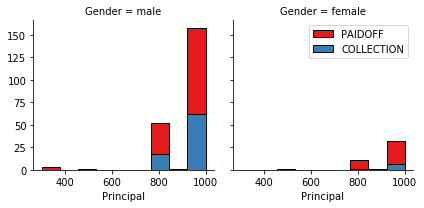

In [97]:
import seaborn as sns
#we create a bin ranging from the smalles principal amount to the largest 
# then diveide it to 10 equal intervals

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

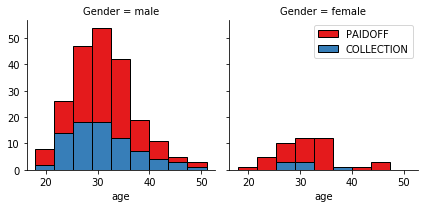

In [99]:
#compairing loan status based on gender and age.
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

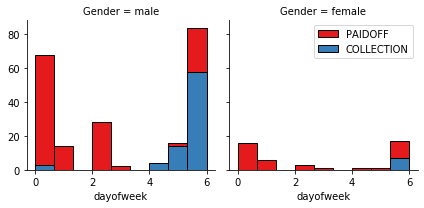

In [100]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [101]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [102]:
#groupby to group the dataset by the variables in the gender column 
#call only the loan_status column
#normlaize the values because we have more male than female in the dataset.
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [103]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [104]:
xf=df.groupby(['education'])['loan_status'].value_counts(normalize=True)

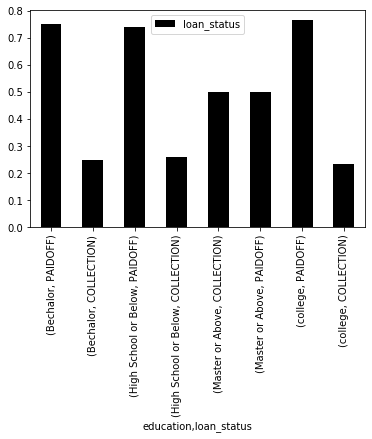

In [105]:
xf=pd.DataFrame(xf)
xf.axes
xf.plot(kind='bar',stacked=True,color='k')

#### Feature befor One Hot Encoding

In [106]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [128]:
xx=df.loc[:,'education']=='Master or Above'
df[xx]

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
50,PAIDOFF,800,15,2016-09-11,2016-09-25,39,Master or Above,0,6,1
293,COLLECTION,1000,15,2016-09-11,2016-09-25,50,Master or Above,0,6,1


In [121]:
df.groupby('education')['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

In [116]:
df.education.value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [147]:
#one hot encoding is a technique for transforming catergorical variables in this context strings
#sklearn implementation of none hot encoding only works on integers
#pands get_dummies works on text categroical variables
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df[['education','loan_status']])],axis=1)
Feature.drop(['education_Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_college,loan_status_COLLECTION,loan_status_PAIDOFF
0,1000,30,45,0,0,0,1,0,0,1
1,1000,30,33,1,0,1,0,0,0,1
2,1000,15,27,0,0,0,0,1,0,1
3,1000,30,28,1,1,0,0,1,0,1
4,1000,30,29,0,1,0,0,1,0,1


In [156]:
#seperating a the target label from the predictors
x=Feature.iloc[:,0:8]
y=Feature.iloc[:,9:]

In [159]:
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Feature selection

What are our lables?

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [183]:
scaler= preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [185]:
from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier()
param_grid=dict(n_neighbors=[3,6,9,12,15])

In [186]:
grid_neighbor=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)
grid_neighbor.fit(x_train,y_train)
grid_neighbor.score(x_test,y_test)

C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

0.7701149425287356

In [187]:
predict_k=grid_neighbor.predict(x_test)

In [188]:
grid_neighbor.best_estimator_

KNeighborsClassifier(n_neighbors=9)

# Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier
param_grid=dict(max_features=[3,4,2,6],max_depth=[3,4,5,6,12])
grid_deci=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5)
grid_deci.fit(x_train,y_train)
grid_deci.score(x_test,y_test)

0.7011494252873564

In [218]:
predict_deci=grid_deci.predict(x_test)
grid_deci.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=4)

# Support Vector Machine

In [198]:
from sklearn.svm import SVC
param_grid = [{'kernel': ['rbf'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_svc = GridSearchCV(SVC(), param_grid, cv=5)
grid_svc.fit(x_train, y_train)

C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [199]:
grid_svc.score(x_test,y_test)

0.6896551724137931

In [200]:
predict_svc=grid_neighbor.predict(x_test)
grid_svc.best_estimator_

SVC(C=1, kernel='linear')

# Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
param_grid=dict(C=[0.1,0.01,10,100])
grid_lg=GridSearchCV(LogisticRegression(solver='liblinear'),param_grid=param_grid,cv=5)
grid_lg.fit(x_train,y_train)
grid_lg.score(x_test,y_test)



C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Homet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

0.6781609195402298

In [207]:
predict_lg=grid_lg.predict(x_test)

In [205]:
print(grid_lg.best_estimator_)

LogisticRegression(C=10, solver='liblinear')


In [210]:
yhat_prob = grid_lg.predict_proba(x_test)
yhat_prob

array([[0.4761656 , 0.5238344 ],
       [0.01617051, 0.98382949],
       [0.5945422 , 0.4054578 ],
       [0.00872627, 0.99127373],
       [0.27178304, 0.72821696],
       [0.00983211, 0.99016789],
       [0.6754517 , 0.3245483 ],
       [0.52115832, 0.47884168],
       [0.01558586, 0.98441414],
       [0.48531133, 0.51468867],
       [0.33682201, 0.66317799],
       [0.33635932, 0.66364068],
       [0.29187855, 0.70812145],
       [0.25730246, 0.74269754],
       [0.02234449, 0.97765551],
       [0.56334837, 0.43665163],
       [0.4410941 , 0.5589059 ],
       [0.02251867, 0.97748133],
       [0.29784467, 0.70215533],
       [0.4952937 , 0.5047063 ],
       [0.29950848, 0.70049152],
       [0.4378123 , 0.5621877 ],
       [0.33635932, 0.66364068],
       [0.28134971, 0.71865029],
       [0.01430701, 0.98569299],
       [0.4919636 , 0.5080364 ],
       [0.31347534, 0.68652466],
       [0.40098236, 0.59901764],
       [0.57507334, 0.42492666],
       [0.03315919, 0.96684081],
       [0.

# Model Evaluation using Test set

In [211]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [222]:
#accuracy_scores
predicted=[predict_k,predict_deci,predict_svc,predict_lg]
accuracy_scores=[]
for i in predicted:
    value=accuracy_score(y_test,i)
    accuracy_scores.append(value)

In [232]:
accuracy_scores

[0.7701149425287356,
 0.7011494252873564,
 0.7701149425287356,
 0.6781609195402298]

In [224]:
#f1_score
from sklearn.metrics import f1_score
f1_scores=[]
for i in predicted:
    value=f1_score(y_test,i)
    f1_scores.append(value)

In [225]:
f1_scores

[0.8701298701298701,
 0.8243243243243245,
 0.8701298701298701,
 0.8028169014084506]

In [227]:
#log loss
#this is only applicable to the logistic_regresion model
Logloss=log_loss(y_test,predict_lg)


In [242]:
models=['Knn','Decision_tree','SVC','Log_reg']
evaluation_table=pd.DataFrame({'Algorithm':models,
                              'jacquard_score/accuracy_score':accuracy_scores,
                              'f1_score':f1_scores,'Log_loss':[None,None,None,Logloss]})

In [243]:
evaluation_table

,Algorithm,jacquard_score/accuracy_score,f1_score,Log_loss
0,Knn,0.770115,0.870130,NaN
1,Decision_tree,0.701149,0.824324,NaN
2,SVC,0.770115,0.870130,NaN
3,Log_reg,0.678161,0.802817,11.116075


First, download and load the test set:

In [240]:
evaluation_table

,Algorithm,jacquard_score/accuracy_score,f1_score
0,"[Knn, Decision_tree, SVC, Log_reg]","[0.7701149425287356, 0.7011494252873564, 0.770...","[0.8701298701298701, 0.8243243243243245, 0.870..."


In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation 

In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>